## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W1021 15:40:09.030796   908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1021 15:40:09.033793   908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1021 15:40:09.320575   908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1021 15:40:09.322599   908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1021 15:40:09.348585   908 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W1021 15:40:09.570475   908 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.1276 - acc: 0.2067 - val_loss: 2.1007 - val_acc: 0.1949
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.9395 - acc: 0.2635 - val_loss: 1.9124 - val_acc: 0.2672
Epoch 3/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.8465 - acc: 0.3146 - val_loss: 1.7958 - val_acc: 0.3393
Epoch 4/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.7835 - acc: 0.3449 - val_loss: 1.7660 - val_acc: 0.3494
Epoch 5/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.7401 - acc: 0.3613 - val_loss: 1.8991 - val_acc: 0.3201
Epoch 6/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.7238 - acc: 0.3733 - val_loss: 1.7608 - val_acc: 0.3615
Epoch 7/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.6915 - acc: 0.3882 - val_loss: 1.707

50000/50000 [==============================] - 10s 199us/step - loss: 1.8389 - acc: 0.3429 - val_loss: 1.7267 - val_acc: 0.3792
Epoch 2/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.6023 - acc: 0.4302 - val_loss: 1.6685 - val_acc: 0.3953
Epoch 3/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.5148 - acc: 0.4626 - val_loss: 1.5061 - val_acc: 0.4588
Epoch 4/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.4510 - acc: 0.4834 - val_loss: 1.5664 - val_acc: 0.4472
Epoch 5/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.4076 - acc: 0.4995 - val_loss: 1.4351 - val_acc: 0.4876
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.3702 - acc: 0.5126 - val_loss: 1.4326 - val_acc: 0.4804
Epoch 7/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.3307 - acc: 0.5265 - val_loss: 1.3927 - val_acc: 0.5064
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.8256 - acc: 0.3621 - val_loss: 1.7795 - val_acc: 0.3710
Epoch 3/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.7388 - acc: 0.3893 - val_loss: 1.7017 - val_acc: 0.4066
Epoch 4/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6762 - acc: 0.4131 - val_loss: 1.6497 - val_acc: 0.4255 - acc: 0.
Epoch 5/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6282 - acc: 0.4298 - val_loss: 1.6156 - val_acc: 0.4297
Epoch 6/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.5889 - acc: 0.4436 - val_loss: 1.5927 - val_acc: 0.4390
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5540 - acc: 0.4547 - val_loss: 1.5657 - val_acc: 0.4468
Epoch 8/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5236 - acc: 0.4659 - val_loss: 1.5266 - val_acc: 0.4588
Epoch 9/50
50000/

Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.0217 - acc: 0.2923 - val_loss: 1.9910 - val_acc: 0.3029
Epoch 4/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.9661 - acc: 0.3122 - val_loss: 1.9435 - val_acc: 0.3217
Epoch 5/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.9242 - acc: 0.3276 - val_loss: 1.9085 - val_acc: 0.3279
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.8919 - acc: 0.3359 - val_loss: 1.8793 - val_acc: 0.3394
Epoch 7/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.8653 - acc: 0.3443 - val_loss: 1.8557 - val_acc: 0.3514
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8426 - acc: 0.3533 - val_loss: 1.8374 - val_acc: 0.3530
Epoch 9/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.8236 - acc: 0.3588 - val_loss: 1.8186 - val_acc: 0.3605
Epoch 10/50
50000/50000 [==

50000/50000 [==============================] - 10s 198us/step - loss: 2.2557 - acc: 0.1761 - val_loss: 2.2419 - val_acc: 0.1831
Epoch 4/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.2322 - acc: 0.1883 - val_loss: 2.2207 - val_acc: 0.1947
Epoch 5/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.2123 - acc: 0.1989 - val_loss: 2.2020 - val_acc: 0.2026
Epoch 6/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.1947 - acc: 0.2079 - val_loss: 2.1854 - val_acc: 0.2133
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1788 - acc: 0.2149 - val_loss: 2.1700 - val_acc: 0.2220
Epoch 8/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.1639 - acc: 0.2235 - val_loss: 2.1556 - val_acc: 0.2272
Epoch 9/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.1499 - acc: 0.2300 - val_loss: 2.1420 - val_acc: 0.2333
Epoch 10/50
50000/50000 [=============

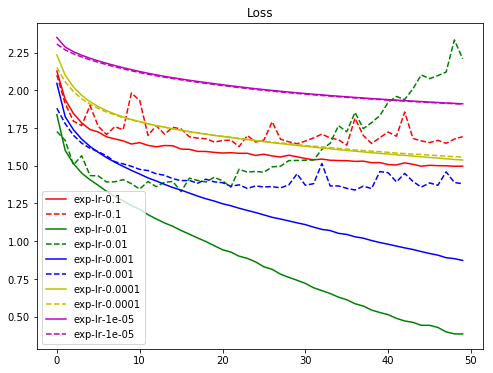

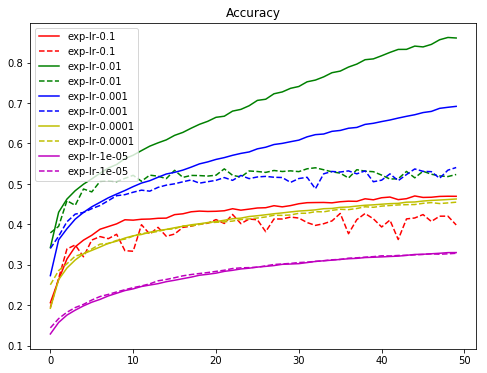

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現